Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not


In [1]:
import pandas as pd
from sklearn import datasets
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
fraud=pd.read_csv('Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
fraud.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [5]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
fraud.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [7]:
fraud.isnull()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
595,False,False,False,False,False,False
596,False,False,False,False,False,False
597,False,False,False,False,False,False
598,False,False,False,False,False,False


In [8]:
import seaborn as sns

#data visualization:

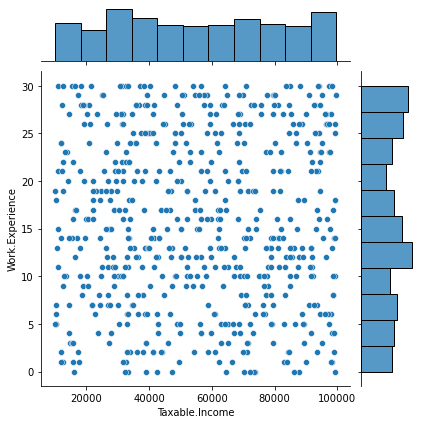

In [9]:
sns.jointplot(x = 'Taxable.Income', y = 'Work.Experience', data = fraud)

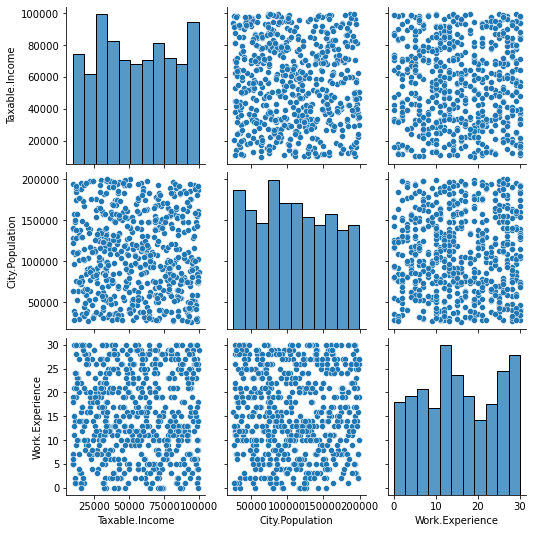

In [10]:
sns.pairplot(fraud)

<AxesSubplot:>

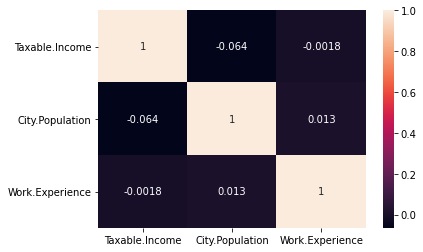

In [11]:
sns.heatmap(fraud.corr(), annot = True)

#Preprocessing:

In [12]:
fraud.loc[fraud["Taxable.Income"] <=30000,"Taxable.Income1"]="Good"
fraud.loc[fraud["Taxable.Income"] >30000,"Taxable.Income1"]="Risky"

In [13]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable.Income1
0,NO,Single,68833,50047,10,YES,Risky
1,YES,Divorced,33700,134075,18,YES,Risky
2,NO,Married,36925,160205,30,YES,Risky
3,YES,Single,50190,193264,15,YES,Risky
4,NO,Married,81002,27533,28,NO,Risky
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Risky
596,YES,Divorced,69967,55369,2,YES,Risky
597,NO,Divorced,47334,154058,0,YES,Risky
598,YES,Married,98592,180083,17,NO,Risky


In [14]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
 6   Taxable.Income1  600 non-null    object
dtypes: int64(3), object(4)
memory usage: 32.9+ KB


In [15]:
#labelEncoder:
a=preprocessing.LabelEncoder()
fraud["Undergrad"]=a.fit_transform(fraud["Undergrad"])
fraud["Marital.Status"]=a.fit_transform(fraud["Marital.Status"])
fraud["Urban"]=a.fit_transform(fraud["Urban"])
fraud["Taxable.Income1"]=a.fit_transform(fraud["Taxable.Income1"])

In [16]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable.Income1
0,0,2,68833,50047,10,1,1
1,1,0,33700,134075,18,1,1
2,0,1,36925,160205,30,1,1
3,1,2,50190,193264,15,1,1
4,0,1,81002,27533,28,0,1
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,1
596,1,0,69967,55369,2,1,1
597,0,0,47334,154058,0,1,1
598,1,1,98592,180083,17,0,1


In [17]:
fraud.drop(['Taxable.Income'],axis=1,inplace=True)

In [18]:
fraud

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income1
0,0,2,50047,10,1,1
1,1,0,134075,18,1,1
2,0,1,160205,30,1,1
3,1,2,193264,15,1,1
4,0,1,27533,28,0,1
...,...,...,...,...,...,...
595,1,0,39492,7,1,1
596,1,0,55369,2,1,1
597,0,0,154058,0,1,1
598,1,1,180083,17,0,1


#EDA:

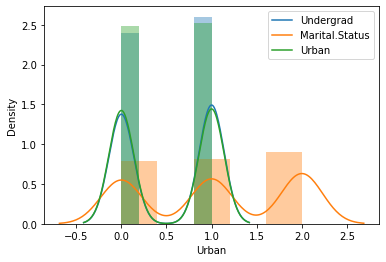

In [19]:
sns.distplot(fraud['Undergrad'])
sns.distplot(fraud['Marital.Status'])
sns.distplot(fraud['Urban'])

plt.legend(['Undergrad','Marital.Status','Urban'])

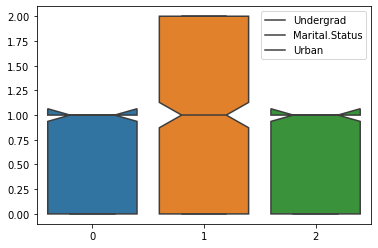

In [21]:
sns.boxplot(data=[fraud['Undergrad'],fraud['Marital.Status'],fraud['Urban']],notch=True)
plt.legend(['Undergrad','Marital.Status','Urban'])



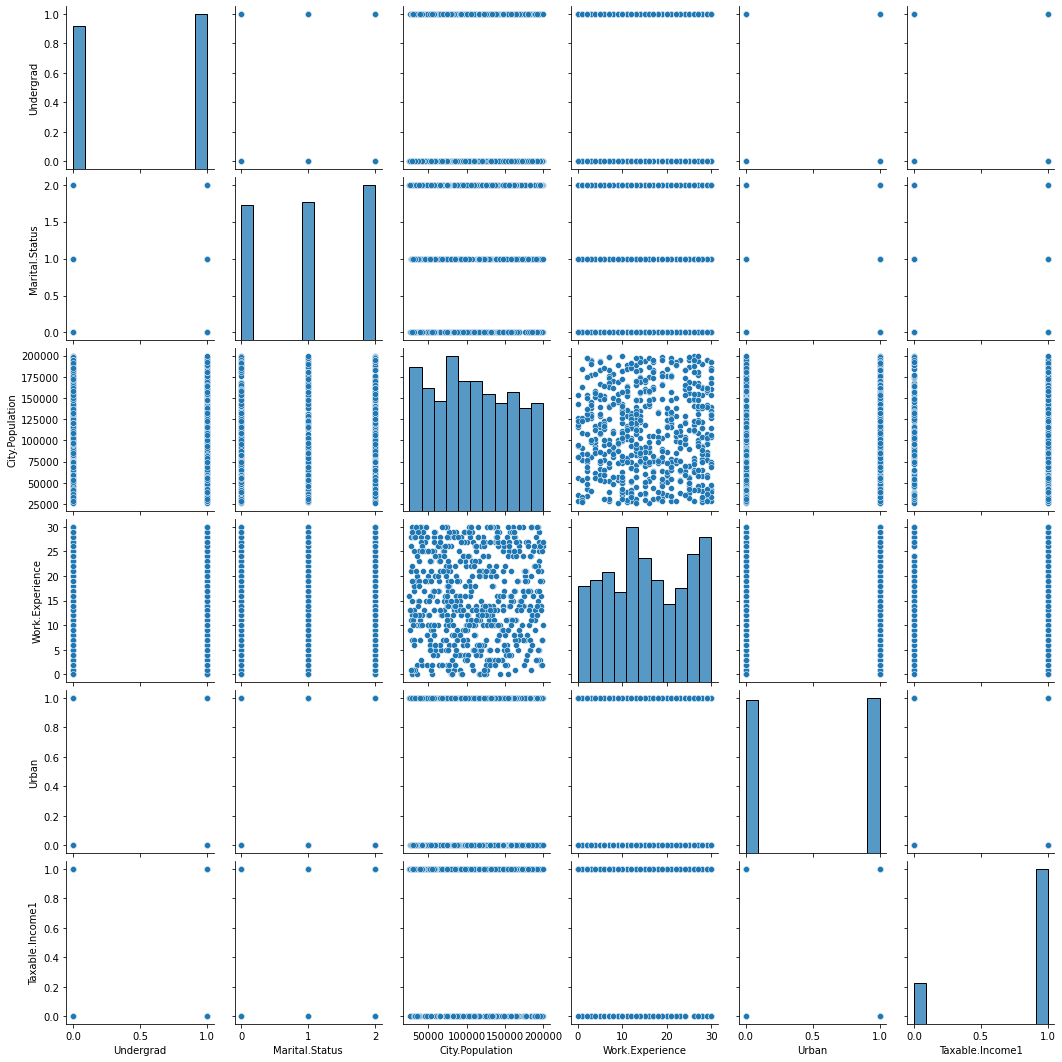

In [22]:
sns.pairplot(fraud)
plt.show()

In [23]:
x=fraud.iloc[:,0:5]
y=fraud['Taxable.Income1']

In [24]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [25]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Taxable.Income1, Length: 600, dtype: int32

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [27]:
#model
model=DecisionTreeClassifier(criterion='entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

#tree:

[Text(193.55625, 195.696, 'X[3] <= 24.5\nentropy = 0.734\nsamples = 480\nvalue = [99, 381]'),
 Text(136.01250000000002, 152.208, 'X[2] <= 197770.0\nentropy = 0.77\nsamples = 373\nvalue = [84, 289]'),
 Text(83.7, 108.72, 'X[3] <= 14.5\nentropy = 0.759\nsamples = 369\nvalue = [81, 288]'),
 Text(41.85, 65.232, 'X[3] <= 11.5\nentropy = 0.689\nsamples = 239\nvalue = [44, 195]'),
 Text(20.925, 21.744, 'entropy = 0.75\nsamples = 182\nvalue = [39, 143]'),
 Text(62.775000000000006, 21.744, 'entropy = 0.429\nsamples = 57\nvalue = [5, 52]'),
 Text(125.55000000000001, 65.232, 'X[2] <= 192857.5\nentropy = 0.862\nsamples = 130\nvalue = [37, 93]'),
 Text(104.625, 21.744, 'entropy = 0.876\nsamples = 125\nvalue = [37, 88]'),
 Text(146.475, 21.744, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(188.32500000000002, 108.72, 'X[3] <= 14.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(167.4, 65.232, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(209.25, 65.232, 'entropy = 0.0\nsamples =

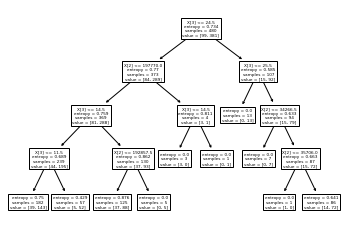

In [32]:
tree.plot_tree(model)

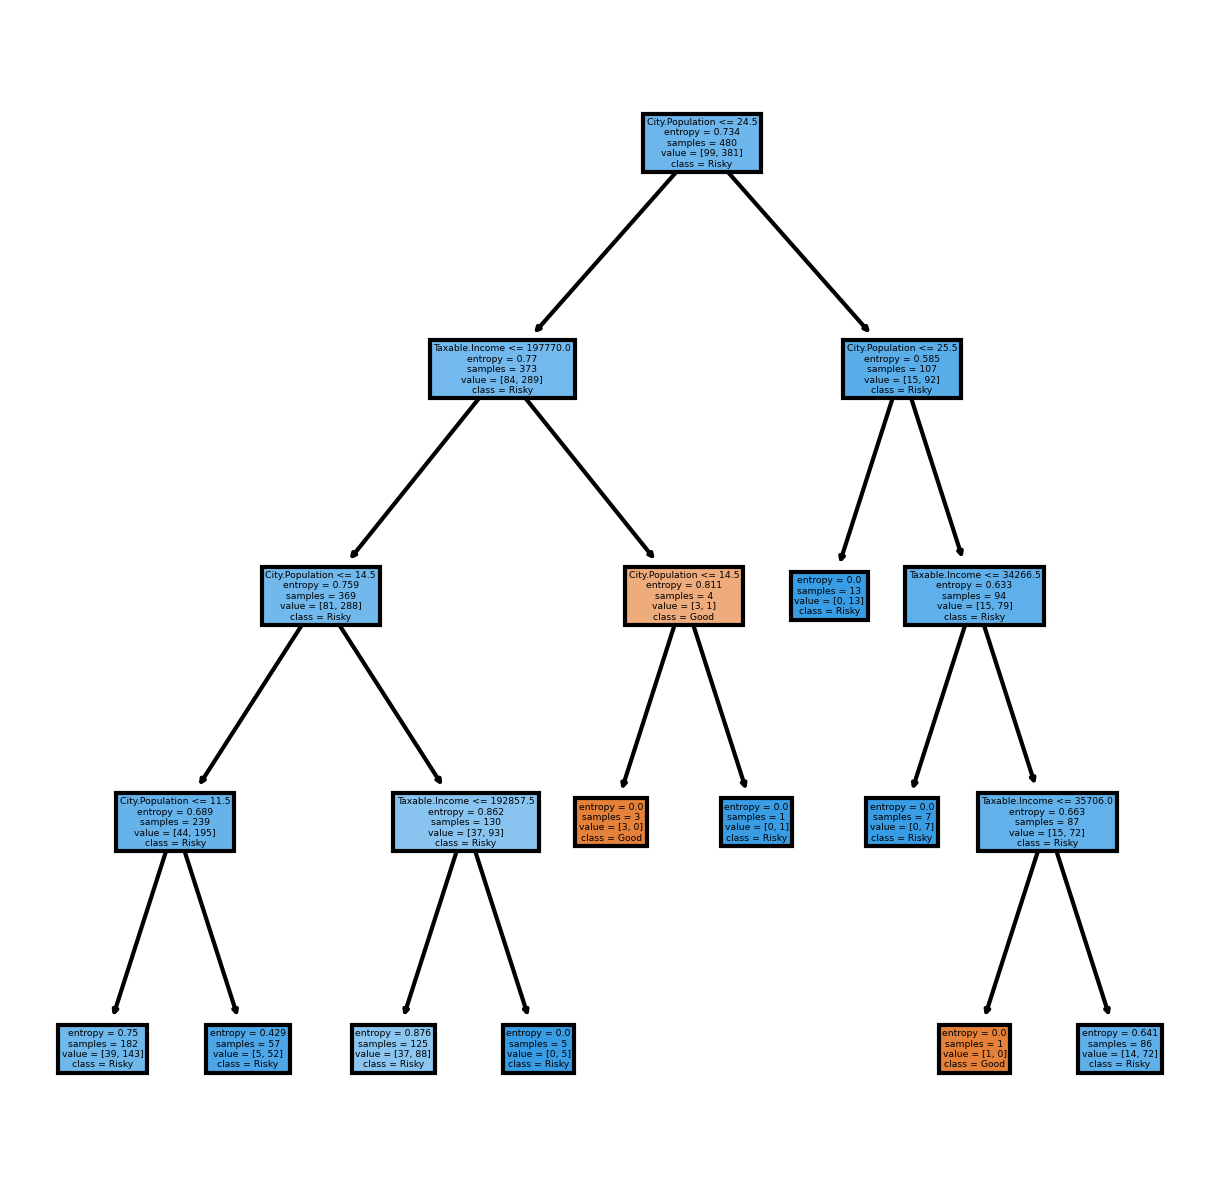

In [33]:
fn = ['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population', 'Work.Experience', 'Urban']
cn = ['Good', 'Risky']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=300)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);

In [34]:
prediction=model.predict(x_test)
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [35]:
pd.Series(prediction).value_counts()

1    119
0      1
dtype: int64

In [36]:
pd.crosstab(y_test,prediction)

col_0,0,1
Taxable.Income1,,
0,0,25
1,1,94


In [31]:
#Accuracy
np.mean(prediction==y_test)

0.7833333333333333